# 6.2 Vector Spaces

In [47]:
%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch06.vectors import *
from ch06.functions import *
from ch06.Vec2 import Vec2
from ch06.Vec3 import Vec3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Exercise 6.8: Run the vector space unit tests with float values for u, v, and w, rather than with objects inheriting from
the Vector class. This demonstrates that real numbers are indeed vectors.

In [8]:
test_vectors(rand_scalar, isclose)

All tests passed


## Building the TitanicPassenger dataset / vectors

(Instead of cargraph, because I'm a hippy)

In [9]:
import pandas as pd
from ch06.TitanicPassenger import *

csv = pd.read_csv("titanic.csv")

passengers = []
for i, row in csv.iterrows():
    survived, p_class, age, siblings, kids, fare, name, sex = row
    passengers.append( TitanicPassenger(survived, p_class, age, siblings, kids, fare, name, sex) )


print(len(passengers))

(passengers[0] + passengers[1]).__dict__

887


{'survived': 1,
 'p_class': 5,
 'age': 46.0,
 'siblings': 0,
 'kids': 0,
 'fare': 0.0,
 'name': '<virtual>',
 'sex': '<virtual>'}

In [10]:
# Avg passenger:
avg_passenger = sum( passengers, TitanicPassenger.zero() ) * 1.0 / len(passengers)
avg_passenger.__dict__

{'survived': 0.3855693348365276,
 'p_class': 2.305524239007892,
 'age': 29.471443066516343,
 'siblings': 0.5253664036076663,
 'kids': 0.38331454340473503,
 'fare': 32.30542018038333,
 'name': '<virtual>',
 'sex': '<virtual>'}

Mini-project 6.9: Run the vector space unit tests for CarForSale to show its objects form a vector space (ignoring
their textual attributes).

In [11]:
from random import randint
rand_pass = lambda : passengers[ randint(0, len(passengers) - 1) ]
test_vectors(rand_pass, TitanicPassenger.approx_eq)

All tests passed


Exercise 6.10: Implement the class Function(Vector) that takes a function of one variable as an argument to its
constructor and implement a __call__ method so you can treat it as a function. You should be able to run
plot([f,g,f+g,3*g],-10,10).

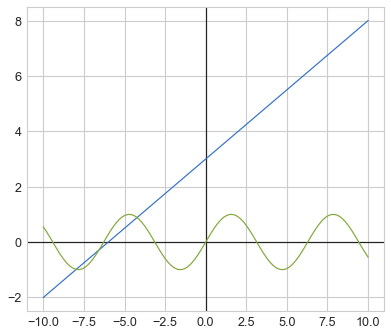

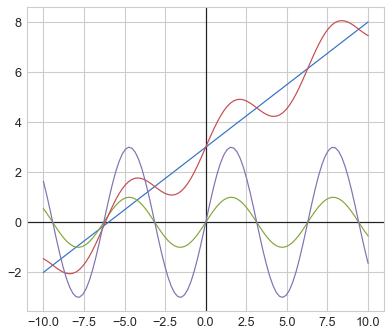

In [12]:
from ch06.Function import *

f = Function(lambda x: 0.5 * x + 3)
g = Function(lambda x: sin(x))

plot([f,g],-10,10)
plot([f,g,f+g,3*g],-10,10)

Mini-project 6.11: Testing equality of functions is difficult. Do your best to write a function to test whether two functions
are equal.

In [13]:
print(f == f)
print(g == g)
print(f == g)

True
True
False


Mini-project 6.12: Unit test your Function class to demonstrate that functions satisfy the vector space properties.

In [14]:
test_vectors(rand_function, approx_equal_funcs)

All tests passed


Mini-project 6.13: Implement a class Function2(Vector) that stores a function of two variables like f(x, y) = x + y.
Solution: The definition is not much different than the Function class, but all functions are given two arguments:

In [15]:
from ch06.Function2 import *
h = Function2(lambda a, b: a + b)
print(h(1, 2))

f = Function2(lambda x,y:x+y)
g = Function2(lambda x,y: x-y+1)
(f+g)(3,10)

3


7

Mini-project 6.15: Implement a Matrix class inheriting from Vector with abstract properties representing the
number of rows and number of columns. You should not be able to instantiate a Matrix class, but you could make a
Matrix5_by_3 class by inheriting from Matrix and explicitly specifying the number of rows and columns.

In [28]:
from ch06.Matrix import *


2 * Matrix2x2(((1,2),(3,4))) + Matrix2x2(((1,2),(3,4)))

Matrix2x2((3, 6), (9, 12))

Exercise 6.17: Unit test the Matrix5_by_3 class to demonstrate that it obeys the defining properties of a vector
space.

In [18]:
print(approx_equal_matrix(Matrix2x2( ( (1,2), (2,2) ) ), Matrix2x2( ( (2,2), (2,2) ) ) )) # no
print(approx_equal_matrix(Matrix2x2( ( (2,2), (2,2) ) ), Matrix2x2( ( (2,2), (2,2) ) ) )) # yes

gen = lambda : rand_matrix(5, 3, Matrix5x3)
test_vectors(gen, approx_equal_matrix)

False
True
All tests passed


Mini-project 6.18: Write a LinearMap3d_to_5d class inheriting from Vector that uses a 5x3 matrix as its data but
implements __call__ to act as a linear map from R 3 to R 5 . Show that it agrees with Matrix5_by_3

In [38]:
# If a matrix A has n rows and m columns, it represents a linear function from m-
# dimensional space to n-dimensional space. (You can write A : R m → R n to say this same sentence

from ch06.LinearMap import LinearMap3d_to_5d

m1 = Matrix5x3( (
    (1, 1, 1),
    (2, 2, 2),
    (3, 3, 3),
    (4, 4, 4),
    (5, 5, 5)
))

m2 = Matrix3x5((
    (1,1,1,1,1),
    (2,2,2,2,2),
    (3,3,3,3,3)
))

m3 = LinearMap3d_to_5d(m1)(m2)
m3.matrix

Matrix5x3((6, 6, 6, 6, 6), (12, 12, 12, 12, 12), (18, 18, 18, 18, 18), (24, 24, 24, 24, 24), (30, 30, 30, 30, 30))

Mini-project 6.19: Write a Python function enabling you to multiply Matrix5_by_3 objects by Vec3 objects in the
sense of matrix multiplication. Update your overloading of the * operator for the vector and matrix classes so you can
multiply vectors on their left by either scalars or matrices.

In [48]:

v = Vec3(0, 1, 2)
print(multiply_vec3_matrix(v, m1))

((3,), (6,), (9,), (12,), (15,))


Exercise 6.20: Convince yourself that the zero vector for the ImageVector class doesn’t visibly alter any image when
it is added.

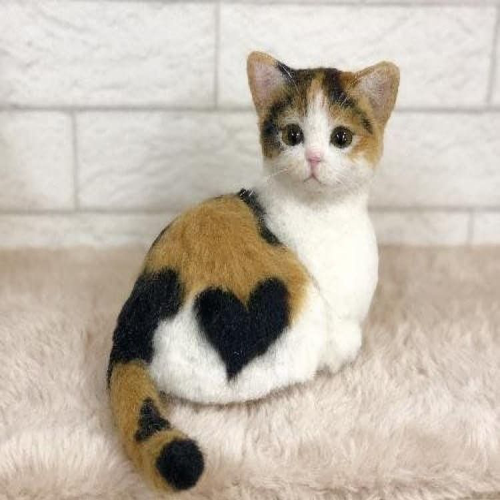

In [69]:
from ch06.ImageVector import ImageVector
cat1 = ImageVector("cat1.jpg")
cat1

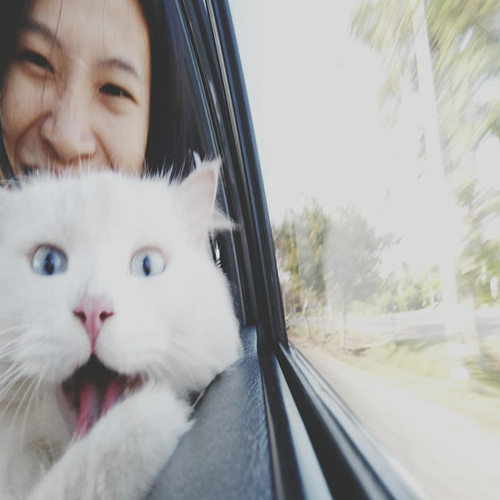

In [50]:
cat2 = ImageVector("cat2.jpg")
cat2

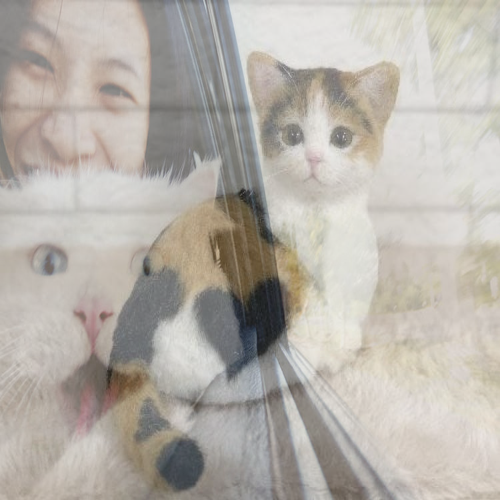

In [61]:
cat1 = ImageVector("cat1.jpg")
cat2 = ImageVector("cat2.jpg")

0.5 * cat1 + 0.5 * cat2

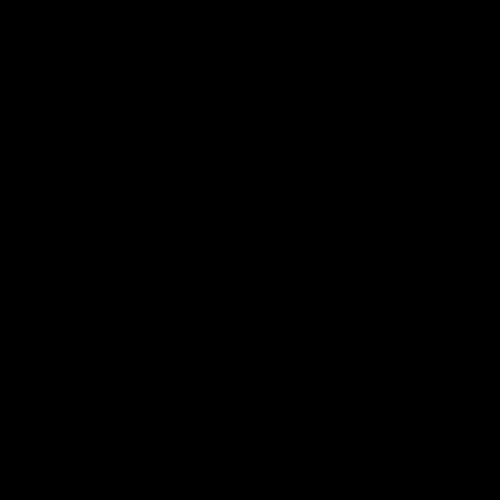

In [57]:
ImageVector.zero()

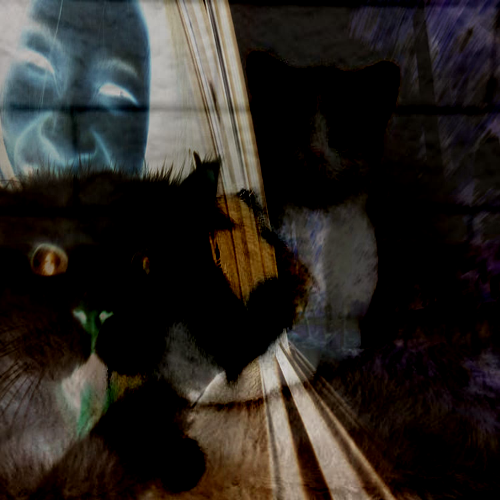

In [60]:
cat1 - cat2

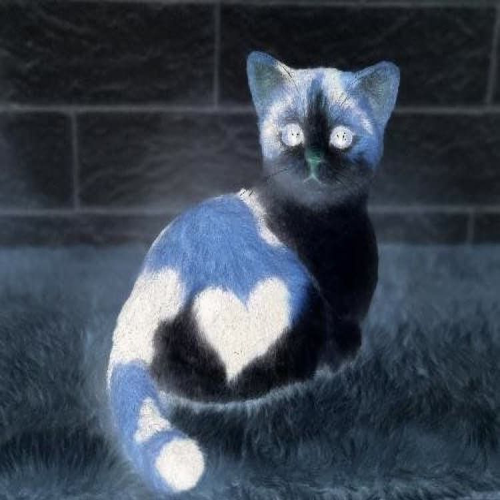

In [64]:
white = ImageVector([(255,255,255) for _ in range(0,500*500)])
white - cat1

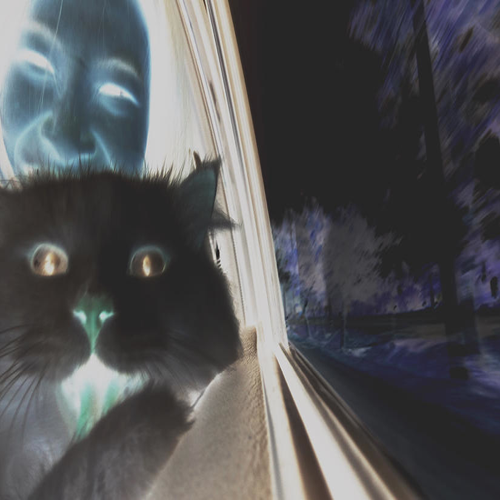

In [65]:
white - cat2

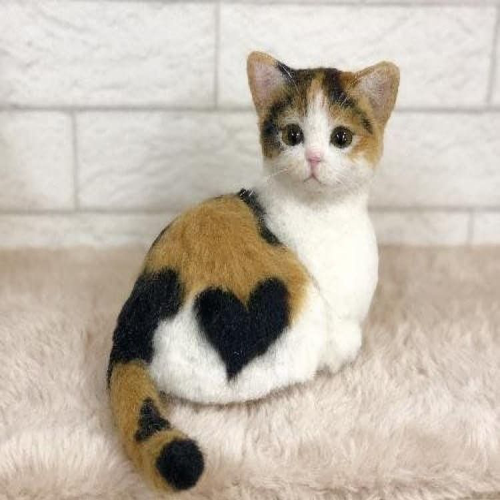

In [70]:
cat1 + ImageVector.zero()